# Autoregressive processes AR(p) :introduction

An autoregressive process AR(p) in time series analysis is a type of stochastic model where each data point is linearly dependent on its previous p data points. It is characterized by a regression of the current observation on its own past values


The general formula for an Autoregressive process or order $p$ - AR(p) process - is defined as follows:

$$
X_{t} =  \phi_{1} X_{t-1} + \phi_{2}  X_{t-2} + ... + \phi_{p}  X_{t-p}+  Z_{t} 
$$


where $\phi_{i}$'s are constants and $\{Z_{t}\}$ is some White Noise $N(0, \sigma_{Z}^{2})$. 


# Mean 

AR(p) could also be expressed differently. For instance, let us consider the AR(1) process

$$
X_{t} = \phi X_{t-1} + Z_{t}
$$


Using sucessive substitutions, we find that $X_{t}$ can be expressed as an $MA(\infty)$ process. Indeed, we have 

$$
\begin{align*} 
 X_{t}& = \phi X_{t-1}+  Z_{t} \\
& = \phi ( \phi X_{t-2} +  Z_{t-1}) +  Z_{t} \\
&  = \phi^{2} ( \phi X_{t-3} +  Z_{t-2}) +  \phi Z_{t-1} + Z_{t} \\
&   = \phi^{3} ( \phi X_{t-4} +  Z_{t-3}) +  \phi^{2} Z_{t-2} + \phi Z_{t-1} + Z_{t} \\
&  = ... \\
&  = Z_{t} + \phi Z_{t-1} + \phi^{2} Z_{t-2} +  \phi^{3} Z_{t-3} + ... \\
\end{align*} 
$$

From here, it is easy to deduce that $E[X_{t}] =  0$. 


# Variance

We can also now deduce the formula for the variance of $X_{t}$, which is given by

$$
\begin{align*} 
 var(X_{t})&  = var( Z_{t} + \phi Z_{t-1} + \phi^{2} Z_{t-2} +  \phi^{3} Z_{t-3} + ... ) \\
&= \sigma_{Z}^{2} (1 + \phi^{2} + \phi^{4} + \phi^{6} + ...) \\
&  = \sigma_{Z}^{2} \sum_{i=0}^{\infty} \phi^{2i} \\
\end{align*} 
$$


And the sum $\sum_{i=0}^{\infty} \phi^{2i} $ will converge to $\frac{1}{1-\phi^{2}}$ provided that $\mid \phi \mid < 1$, so that we find that the variance of $X_{t}$ is

$$
var(X_{t}) = \sigma_{X}^{2} = \frac{\sigma_{Z}^{2}}{1-\phi^{2}}
$$


# Confidence Interval for a AR(1)


Suppose that in a sample of size 100 from an AR(1) process satisfying

$$
X_{t} - \mu = \phi (X_{t-1} - \mu ) + Z_{t}, Z_{t} \sim WN(0, \sigma^{2})
$$


with mean $\mu, \phi = 0.6$ , $\sigma^{2} = 2$ and $E[Z_{t}^{4}] < \infty$. Assume that we observe $\bar{x}_{100} = -0.1308$. 


What is an approximate $95\%$ confidence interval for $\mu$. Are the data compatible with the hypothesis that $\mu = 0$?


The mean $\mu$ is approximately distributed as $N \bigg(\bar{x}_{100}, \frac{\sigma^{2}}{n(1-\phi)^{2}}\bigg)$. A $95\%$ Confidence Interval is given by

$$
CI = [\bar{x}_{100} \pm z_{0.025} \frac{\sigma}{n(1-\phi)}]
$$


where $z_{0.975} \approx 1.96$ is the $2.5\%$ quantile of the Normal distribution. Pluging the numeric values, we get 

$$
CI = -0.1308 \pm 0.693.  = [-0.827, 0.562]
$$


Since $0 \in CI$, the hypothesis that $\mu = 0$ cannot be rejected.

Note: in the examlple below (code and visualization), we use different time series with different means, hence different Confidence Intervals for R and Python. The conclusion remains valid.



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# parameters
mu = phi = 0.6; n = 100; sigma = 2

# sample
np.random.seed(2023)
xt = np.zeros(n)
xt[0] = np.random.normal()  
for i in range(1, n):
    xt[i] = mu + phi * (xt[i - 1] - mu) + np.random.normal(scale=sigma)
xt_centered = xt - mu

# sample mean
np.mean(xt_centered)

# 95% Confidence Interval
CI = [sample_mean - ( norm.ppf(0.975)  * (np.sqrt(2) / (np.sqrt(n) * (1 - phi)))),
      sample_mean + (norm.ppf(0.975) * (np.sqrt(2) / (np.sqrt(n) * (1 - phi))))]
CI

[-0.8796616608140211, 0.5062421635356569]

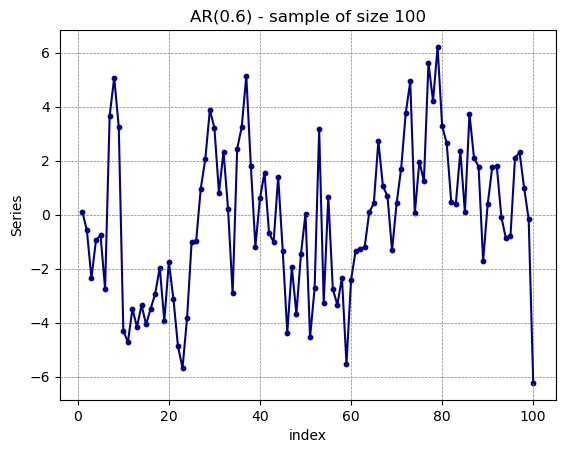

In [11]:
# data reshaping
df = pd.DataFrame({'series': xt_centered, 'index': range(1, n + 1)})

# Visualization
plt.plot(df['index'], df['series'], color='darkblue')
plt.scatter(df['index'], df['series'], s=10, color='darkblue')
plt.title('AR(0.6) - sample of size 100')
plt.xlabel('index')
plt.ylabel('Series')
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()